Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training sequences: 25000
Number of test sequences: 25000
Padding sequences (samples x time)...

--- Training LSTM Model ---
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 229s 288ms/step - accuracy: 0.7207 - loss: 0.5312 - val_accuracy: 0.7971 - val_loss: 0.4450
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 219s 281ms/step - accuracy: 0.8259 - loss: 0.4003 - val_accuracy: 0.8456 - val_loss: 0.3770
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 272s 294ms/step - accuracy: 0.8830 - loss: 0.2931 - val_accuracy: 0.8562 - val_loss: 0.3445
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 220s 281ms/step - accuracy: 0.9097 - loss: 0.2356 - val_accuracy: 0.8616 - val_loss: 0.3688
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 270s 292ms/step - accuracy: 0.9269 - loss: 0.1920 - val_accuracy: 0.8614 - val_loss: 0.3702

--- Training GRU Model ---
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 222s 279ms/step - accuracy: 0.6880 - loss: 0.5612 - val_accuracy: 0.8225 - val_loss: 0.4006
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 231s 296ms/step - accuracy: 0.8834 - loss: 0.2912 - val_accuracy: 0.8822 - val_loss: 0.2808
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 296ms/step - accuracy

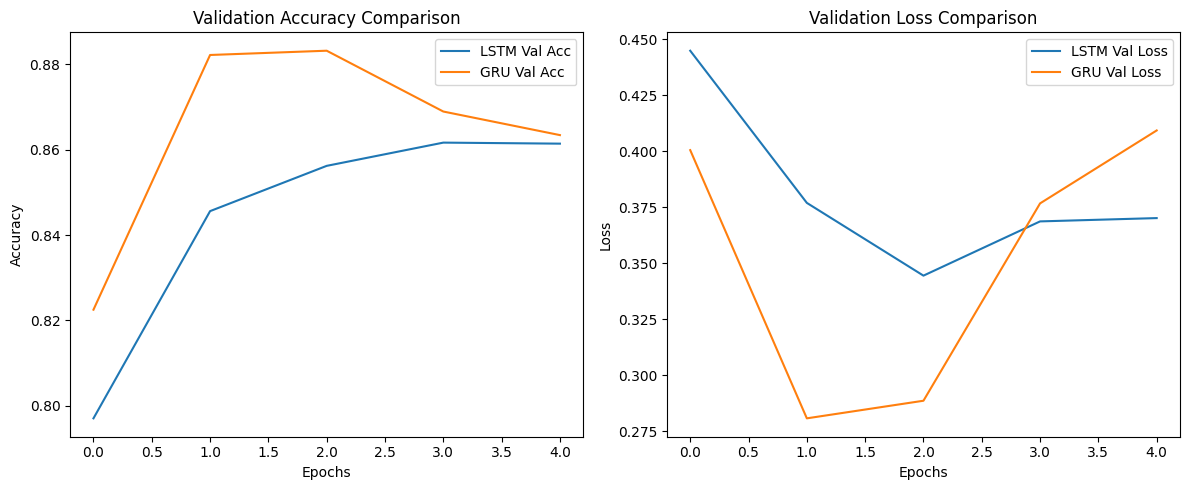

'\nKey Observations:\n1. Convergence Speed: GRUs often converge faster than LSTMs because they have fewer \n   parameters (one less gate).\n2. Performance: On the IMDB dataset, performance is usually comparable. LSTMs might \n   slightly outperform GRUs on very long sequences due to the separate memory cell.\n3. Computational Efficiency: GRUs are computationally cheaper and faster to train \n   per epoch.\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout

# --- 1. Data Loading and Preprocessing ---
max_features = 10000  # Number of words to consider as features
maxlen = 200         # Cut texts after this number of words

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(f"Number of training sequences: {len(x_train)}")
print(f"Number of test sequences: {len(x_test)}")

# Padding sequences to ensure uniform input size
# 'post' padding means zeros are added at the end of the sequence
print("Padding sequences (samples x time)...")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# --- 2. Model Building Functions ---

def build_lstm_model():
    model = Sequential([
        Embedding(max_features, 128, input_length=maxlen),
        LSTM(64, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model():
    model = Sequential([
        Embedding(max_features, 128, input_length=maxlen),
        GRU(64, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- 3. Training and Evaluation ---

epochs = 5
batch_size = 32

print("\n--- Training LSTM Model ---")
lstm_model = build_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test))

print("\n--- Training GRU Model ---")
gru_model = build_gru_model()
gru_history = gru_model.fit(x_train, y_train,
                           batch_size=batch_size,
                           epochs=epochs,
                           validation_data=(x_test, y_test))

# --- 4. Comparative Analysis Visualization ---

def plot_history(histories, names):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=f'{names[i]} Val Acc')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['val_loss'], label=f'{names[i]} Val Loss')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([lstm_history, gru_history], ['LSTM', 'GRU'])

# --- 5. Summary of Effects: LSTM vs GRU ---
"""
Key Observations:
1. Convergence Speed: GRUs often converge faster than LSTMs because they have fewer
   parameters (one less gate).
2. Performance: On the IMDB dataset, performance is usually comparable. LSTMs might
   slightly outperform GRUs on very long sequences due to the separate memory cell.
3. Computational Efficiency: GRUs are computationally cheaper and faster to train
   per epoch.
"""